# This is the opening exploration of Data from the phone system

This data was exported piecemeal from excel and imported to pandas and unified as a dataset.  

In [1]:
import pandas as pd
import glob
import os

# Define the directory path relative to the script location
directory =  "Attachments_call_data"

# Get all CSV files in the directory that match the pattern
csv_files = glob.glob(os.path.join(directory, "csv-queue-report*.csv"))

# List to store individual dataframes
dfs = []

# Read each CSV file
for file in csv_files:
    # Read CSV file
    df = pd.read_csv(file)
    
    # Remove the "Total" row
    df = df[df['Time'] != 'Total']
    
    # Convert Time column to datetime
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Add to list of dataframes
    dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(dfs, ignore_index=True)

# Sort by time
combined_df = combined_df.sort_values('Time')

# Remove duplicates if any
combined_df = combined_df.drop_duplicates(subset=['Time'])



  


# Simple Exploration

What do we notice first about the data?

In [46]:
combined_df.head()

,Time,Total Calls,Total Calls [Min. Call Length],Connected Calls,Calls Not Connected,Calls Not Connected (Length Limit Reached),Calls Not Connected (Contact Hung Up),Calls Not Connected (Caller Hangup Within 5 Seconds),Calls Not Connected (Caller Hangup Within 10 Seconds),Calls Not Connected (Caller Hangup Within 20 Seconds),...,TOTAL CALLS INCLUDING HANGUPS (M),Avg Call Length (s),Longest Wait Time (s),Avg Wait Time (s),Avg Answer Time (s),Avg Wrap Up Time (s),Max. Queue Length,Avg Talk Time (s),Day,TimeSlot
0,2024-12-02 08:00:00,272,272.0,78,194,193,1,0,0,0,...,856.0,189.0,1066,161.16,554.21,17.39,20,96.31,Monday,08:00
1,2024-12-02 08:30:00,248,248.0,33,215,212,3,0,0,0,...,895.2,217.0,2193,193.33,1318.63,18.90,20,174.26,Monday,08:30
2,2024-12-02 09:00:00,107,107.0,22,85,80,5,1,1,2,...,870.9,488.0,3818,442.13,2095.96,20.15,20,224.63,Monday,09:00
3,2024-12-02 09:30:00,43,43.0,13,30,26,4,0,2,2,...,657.3,917.0,3926,865.17,2806.11,20.00,20,171.84,Monday,09:30
4,2024-12-02 10:00:00,75,75.0,12,63,62,1,0,1,1,...,320.4,256.0,2477,236.30,1476.34,23.07,20,125.10,Monday,10:00


In [47]:
combined_df.head(2)

,Time,Total Calls,Total Calls [Min. Call Length],Connected Calls,Calls Not Connected,Calls Not Connected (Length Limit Reached),Calls Not Connected (Contact Hung Up),Calls Not Connected (Caller Hangup Within 5 Seconds),Calls Not Connected (Caller Hangup Within 10 Seconds),Calls Not Connected (Caller Hangup Within 20 Seconds),...,TOTAL CALLS INCLUDING HANGUPS (M),Avg Call Length (s),Longest Wait Time (s),Avg Wait Time (s),Avg Answer Time (s),Avg Wrap Up Time (s),Max. Queue Length,Avg Talk Time (s),Day,TimeSlot
0,2024-12-02 08:00:00,272,272.0,78,194,193,1,0,0,0,...,856.0,189.0,1066,161.16,554.21,17.39,20,96.31,Monday,08:00
1,2024-12-02 08:30:00,248,248.0,33,215,212,3,0,0,0,...,895.2,217.0,2193,193.33,1318.63,18.90,20,174.26,Monday,08:30


### What are the data structures?

In [48]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 0 to 125
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Time                                                   567 non-null    datetime64[ns]
 1   Total Calls                                            567 non-null    int64         
 2   Total Calls [Min. Call Length]                         546 non-null    float64       
 3   Connected Calls                                        567 non-null    int64         
 4   Calls Not Connected                                    567 non-null    int64         
 5   Calls Not Connected (Length Limit Reached)             567 non-null    int64         
 6   Calls Not Connected (Contact Hung Up)                  567 non-null    int64         
 7   Calls Not Connected (Caller Hangup Within 5 Seconds)   567 non-null    int64

In [1]:

import sys
print(f"Python path: {sys.executable}")

# Try to import and check seaborn version
try:
    import seaborn as sns
    print(f"Seaborn version: {sns.__version__}")
except ImportError:
    print("Seaborn not found")
    !pip install seaborn  # This will install seaborn in the current environment

Python path: /Users/clexp/Sync/hsma/anaconda3/envs/bap3/bin/python3
Seaborn not found
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.7 MB/s eta 0:00:0031m10.9 MB/s eta 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.3-py3-none-any.

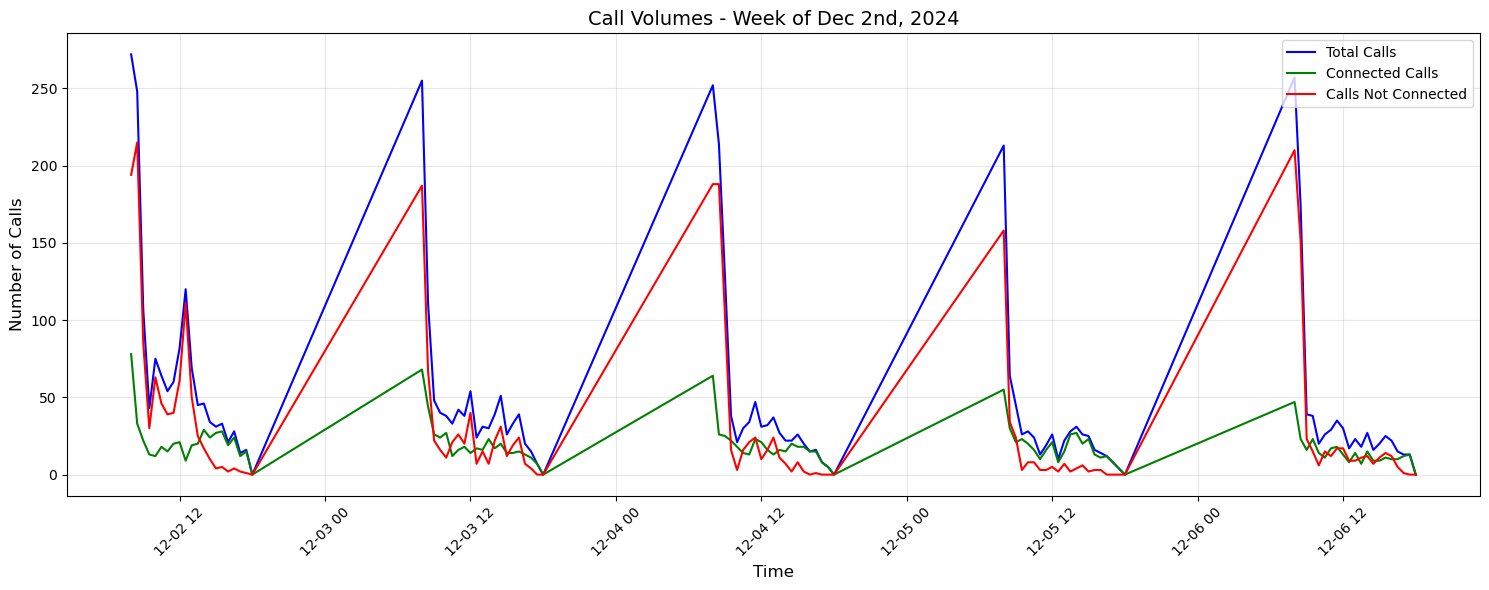

In [50]:
import matplotlib.pyplot as plt


# Filter for one week of data (assuming we want the first week in the dataset)
one_week = combined_df.set_index('Time').loc['2024-12-02':'2024-12-08']

# Create a figure with a larger size
plt.figure(figsize=(15, 6))
# Plot total calls
plt.plot(one_week.index, one_week['Total Calls'], label='Total Calls', color='blue')
plt.plot(one_week.index, one_week['Connected Calls'], label='Connected Calls', color='green')
plt.plot(one_week.index, one_week['Calls Not Connected'], label='Calls Not Connected', color='red')

# Customize the plot
plt.title('Call Volumes - Week of Dec 2nd, 2024', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Calls', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

### Call volumes across the week

Call volumes across the week
There are obvious peaks upon this call volume graph. While this doesn't make a huge amount of sense it does if you consider that this covers the whole week including each day.
The graph reveals the morning peak at first and a tail off across the day, then repeats this for the other days of the week. Clearly the highest peak is Monday morning and the lowest is Thursday morning.
It's interesting tonight that not connected calls is closely behind total calls. This suggests a large number of people cut off is this an indirect metric of dissatisfaction?
The Monday's data seems to suggest there is a second peak in the day at around midday. This is more clearly visible on other graphs.


## Assessment

This is one months worth of data. Clearly there are four peaks for each week. The majority of the week seem to be at the low levels across the hours of the day the high peaks appear to be probably a Monday morning looking back at the data, this is what we can see most of the time it appears there are 10 to 50 calls an hour but at the start of each week there's a big surge.

#### Where are we going with this?

The role of this data exploration is to see if there's a pattern where we can predict a demand for any given half hour period across the week. This requires extracting comparable half hour slots for each week across the month. This requires calculating the main and standard deviation for the number of half hour calls across the week.

In [51]:
import pandas as pd
import numpy as np

# Create day of week and time columns
combined_df['Day'] = combined_df['Time'].dt.day_name()
combined_df['TimeSlot'] = combined_df['Time'].dt.strftime('%H:%M')

# Function to get stats for a specific day and time slot
def get_timeslot_stats(df, day, time_slot):
    mask = (df['Day'] == day) & (df['TimeSlot'] == time_slot)
    slot_data = df[mask]
    
    stats = {
        'Day': day,
        'TimeSlot': time_slot,
        'Mean_Total_Calls': slot_data['Total Calls'].mean(),
        'StdDev_Total_Calls': slot_data['Total Calls'].std(),
        'Mean_Connected': slot_data['Connected Calls'].mean(),
        'StdDev_Connected': slot_data['Connected Calls'].std(),
        'Count': len(slot_data),  # Number of observations
    }
    return stats

# Get unique days and time slots
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
time_slots = sorted(combined_df['TimeSlot'].unique())

# Calculate stats for each day and time slot
stats_list = []
for day in days:
    for slot in time_slots:
        stats = get_timeslot_stats(combined_df, day, slot)
        stats_list.append(stats)

# Create DataFrame with results
stats_df = pd.DataFrame(stats_list)

# Sort by day and time slot
stats_df = stats_df.sort_values(['Day', 'TimeSlot'])

# Display the first few rows
print("\nStats for Monday morning slots:")
monday_morning = stats_df[stats_df['Day'] == 'Monday'].head()
display(monday_morning)


Stats for Monday morning slots:


,Day,TimeSlot,Mean_Total_Calls,StdDev_Total_Calls,Mean_Connected,StdDev_Connected,Count
0,Monday,08:00,235.2,49.906913,67.0,9.695360,5
1,Monday,08:30,171.6,80.763853,27.6,5.224940,5
2,Monday,09:00,80.8,26.109385,21.4,3.361547,5
3,Monday,09:30,59.6,23.891421,16.0,7.176350,5
4,Monday,10:00,54.4,21.442948,16.6,6.949820,5


,Day,TimeSlot,Mean_Total_Calls,StdDev_Total_Calls,Mean_Connected,StdDev_Connected,Count
84,Friday,08:00,181.4,58.611432,67.600000,12.581733,5
0,Monday,08:00,235.2,49.906913,67.000000,9.695360,5
63,Thursday,08:00,159.2,93.025265,47.800000,27.362383,5
21,Tuesday,08:00,189.5,94.377434,69.166667,14.634434,6
42,Wednesday,08:00,131.0,108.535708,47.500000,37.039168,6


,Day,TimeSlot,Mean_Total_Calls,StdDev_Total_Calls,Mean_Connected,StdDev_Connected,Count
0,Monday,08:00,235.2,49.906913,67.0,9.695360,5
1,Monday,08:30,171.6,80.763853,27.6,5.224940,5
2,Monday,09:00,80.8,26.109385,21.4,3.361547,5
3,Monday,09:30,59.6,23.891421,16.0,7.176350,5
4,Monday,10:00,54.4,21.442948,16.6,6.949820,5
5,Monday,10:30,60.4,21.801376,14.2,5.118594,5
6,Monday,11:00,54.4,11.717508,15.4,2.302173,5
7,Monday,11:30,49.6,12.177849,18.6,3.974921,5
8,Monday,12:00,55.2,20.462160,17.8,3.114482,5
9,Monday,12:30,60.2,39.378928,12.4,2.880972,5


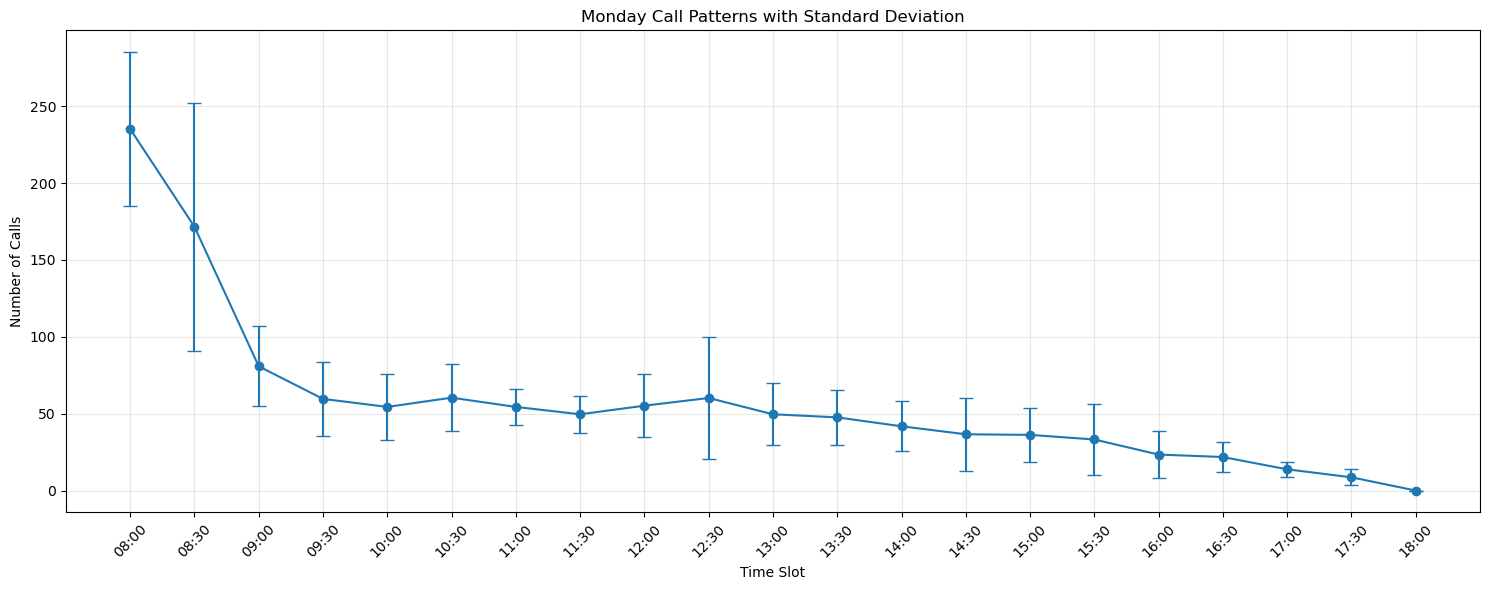

In [52]:
morning_rush = stats_df[stats_df['TimeSlot'] == '08:00']
display(morning_rush)

# Or to look at all Monday slots
monday_slots = stats_df[stats_df['Day'] == 'Monday']
display(monday_slots)

# Create a visualization of the Monday pattern
plt.figure(figsize=(15, 6))
plt.errorbar(monday_slots['TimeSlot'], 
            monday_slots['Mean_Total_Calls'],
            yerr=monday_slots['StdDev_Total_Calls'],
            fmt='o-',
            capsize=5)
plt.title('Monday Call Patterns with Standard Deviation')
plt.xlabel('Time Slot')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Typical analysis of Monday's pattern.

The Two chief features of this graph are the morning peak and the daytime average. The morning Peak rapidly descends after about 60 to 90 minutes. The daytime trend seems to average around 50 calls per 30 minutes taper and gradually off across the day. There is a small jump around lunchtime.  

This comment matches the cool handlers experience. It's also worth commenting that it seems to be substantial variation in the standard deviation around the peak at the start of the day and at lunchtime.



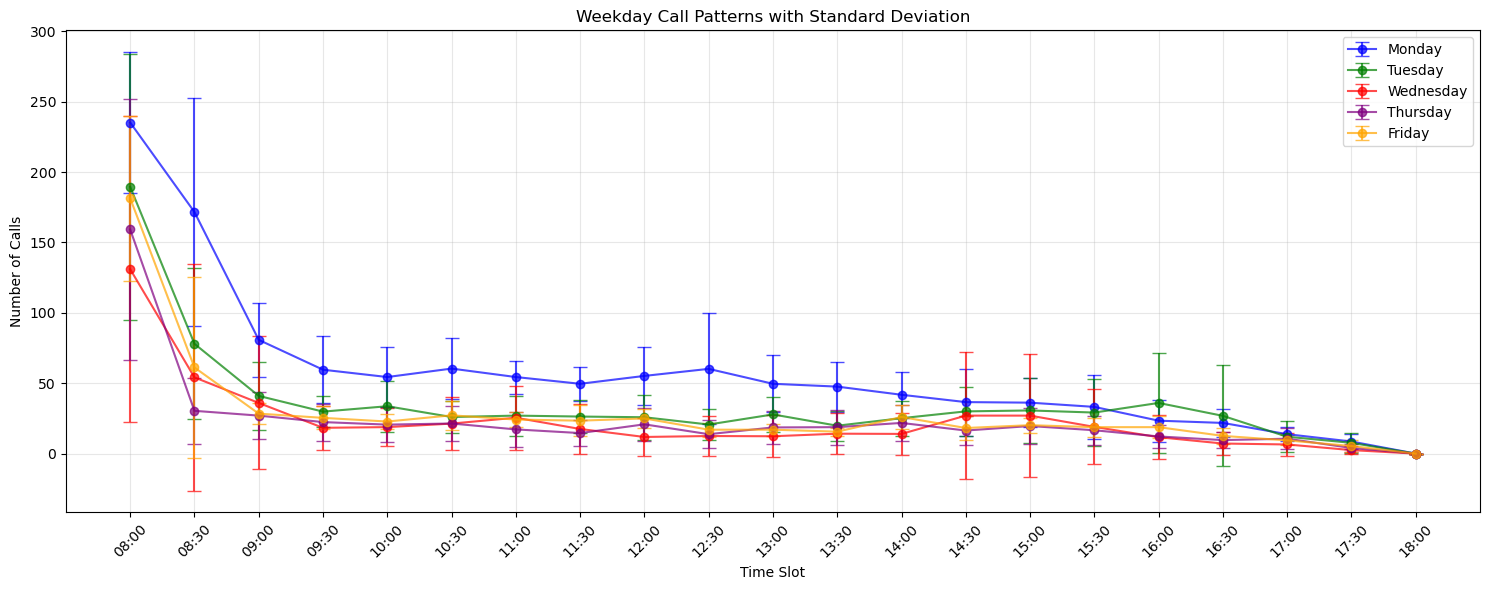

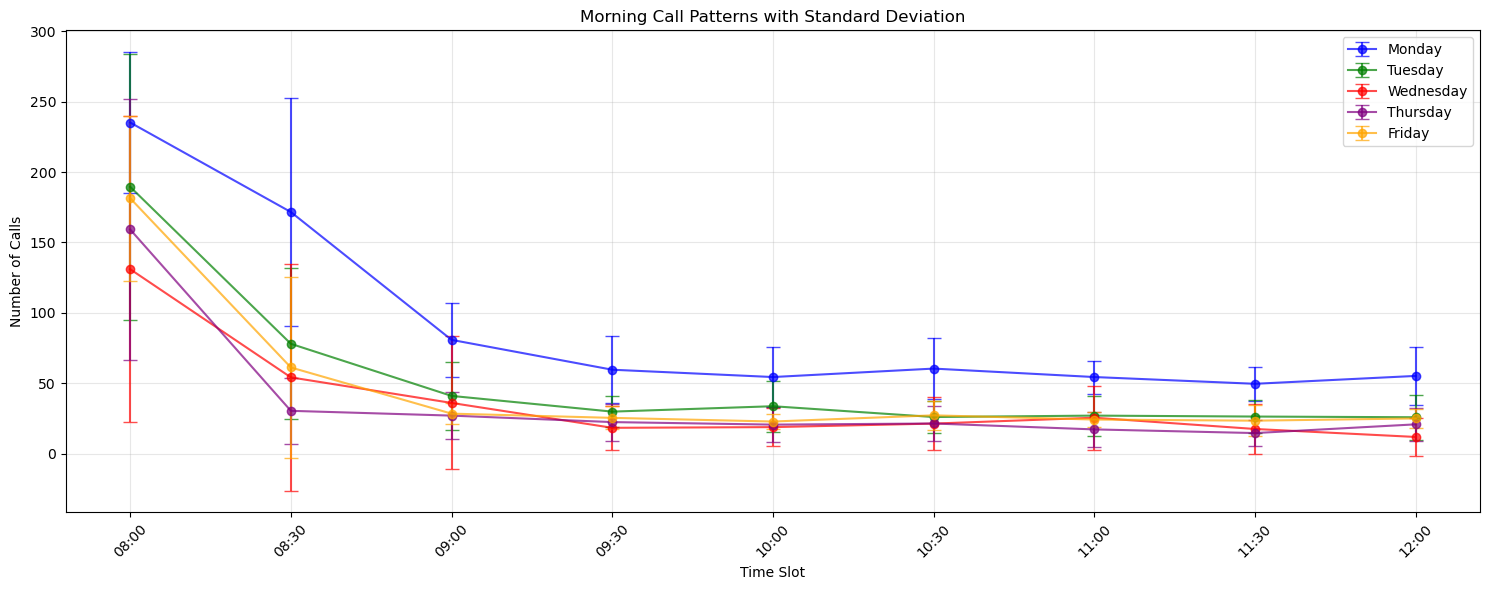

In [53]:
# Create a visualization of all weekdays' patterns
plt.figure(figsize=(15, 6))

# Define colors for each day
colors = {
    'Monday': 'blue',
    'Tuesday': 'green',
    'Wednesday': 'red',
    'Thursday': 'purple',
    'Friday': 'orange'
}

# Plot each day
for day in days:
    day_slots = stats_df[stats_df['Day'] == day]
    plt.errorbar(day_slots['TimeSlot'], 
                day_slots['Mean_Total_Calls'],
                yerr=day_slots['StdDev_Total_Calls'],
                fmt='o-',
                capsize=5,
                label=day,
                color=colors[day],
                alpha=0.7)  # Slight transparency to help see overlaps

plt.title('Weekday Call Patterns with Standard Deviation')
plt.xlabel('Time Slot')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Optionally, you might want to see just the morning rush
plt.figure(figsize=(15, 6))
morning_slots = ['08:00', '08:30', '09:00', '09:30', '10:00', '10:30', '11:00', '11:30', '12:00']

for day in days:
    day_slots = stats_df[
        (stats_df['Day'] == day) & 
        (stats_df['TimeSlot'].isin(morning_slots))
    ]
    plt.errorbar(day_slots['TimeSlot'], 
                day_slots['Mean_Total_Calls'],
                yerr=day_slots['StdDev_Total_Calls'],
                fmt='o-',
                capsize=5,
                label=day,
                color=colors[day],
                alpha=0.7)

plt.title('Morning Call Patterns with Standard Deviation')
plt.xlabel('Time Slot')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Comparing the weeks patterns

These two graphs show similar data to the graph for just Monday.

They both show the morning peak and the daytime average trend. It's interesting to note that Monday is higher than all of the other days but also interesting that Friday is higher than some quieter days particularly Thursday.

The standard deviations tend to be higher around higher demands.

The second graph is a zoom in on just the morning of the weeks data. This Taper off matches the Call handlers experience.

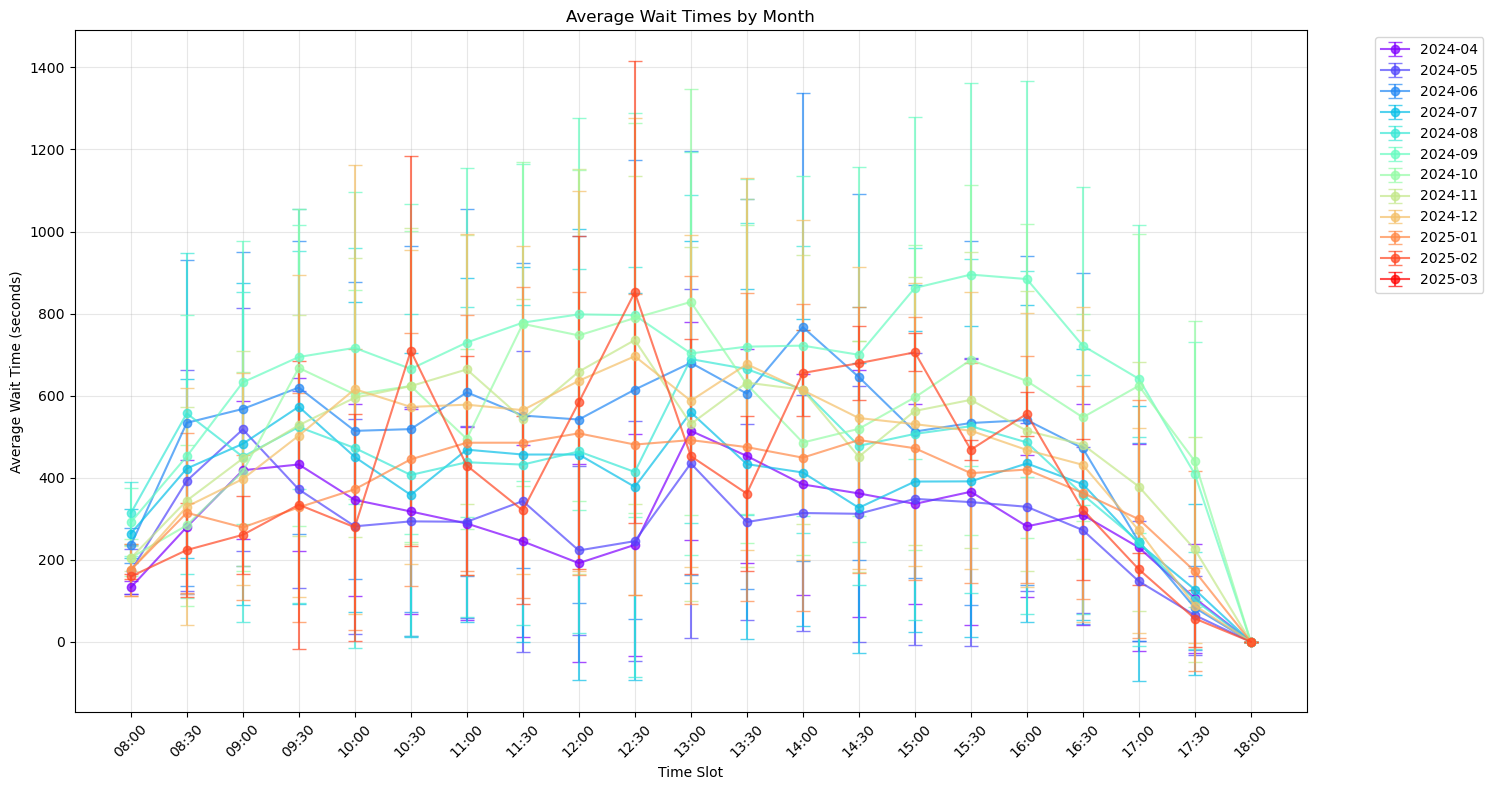


Monthly Summary Statistics:
           mean     std  min     max
Month                               
2024-04  296.44  122.40  0.0  514.10
2024-05  284.98  117.62  0.0  517.52
2024-06  494.50  193.47  0.0  767.05
2024-07  381.21  133.78  0.0  572.87
2024-08  435.10  166.04  0.0  689.05
2024-09  657.52  212.20  0.0  895.00
2024-10  551.98  202.09  0.0  828.26
2024-11  491.35  178.08  0.0  735.38
2024-12  466.23  192.32  0.0  695.86
2025-01  376.79  133.44  0.0  507.96
2025-02  408.64  231.32  0.0  852.00
2025-03     NaN     NaN  NaN     NaN


In [54]:
# Import numpy for the color mapping
import numpy as np

# Read the CSV file
df = pd.read_csv('2024-25 PMP Telephony Dashboard(2024-25 Raw Data (2)).csv')

# Create datetime from Date and Time columns with UK date format
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], 
                              format='%d/%m/%Y %H:%M',  # Specify UK date format
                              dayfirst=True)  # Tell pandas it's day first

# Create Month and TimeSlot columns
df['Month'] = df['DateTime'].dt.strftime('%Y-%m')
df['TimeSlot'] = df['Time']  # The Time column already contains the time slots

# Calculate monthly statistics
monthly_stats = df.groupby(['Month', 'TimeSlot']).agg({
    'Avg Wait Time (s)': ['mean', 'std', 'count']
}).reset_index()

# Flatten column names
monthly_stats.columns = ['Month', 'TimeSlot', 'Mean_Wait_Time', 'StdDev_Wait_Time', 'Count']

# Create visualization of monthly patterns
plt.figure(figsize=(15, 8))

# Define colors for each month
unique_months = sorted(monthly_stats['Month'].unique())
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_months)))
month_colors = dict(zip(unique_months, colors))

# Plot each month
for month in unique_months:
    month_data = monthly_stats[monthly_stats['Month'] == month]
    month_data = month_data.sort_values('TimeSlot')
    
    plt.errorbar(month_data['TimeSlot'], 
                month_data['Mean_Wait_Time'],
                yerr=month_data['StdDev_Wait_Time'],
                fmt='o-',
                capsize=5,
                label=month,
                color=month_colors[month],
                alpha=0.7)

plt.title('Average Wait Times by Month')
plt.xlabel('Time Slot')
plt.ylabel('Average Wait Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nMonthly Summary Statistics:")
summary = monthly_stats.groupby('Month')['Mean_Wait_Time'].agg(['mean', 'std', 'min', 'max']).round(2)
print(summary)

### Adding an annual data

This is a very busy graph and probably should be simplified.

The key point on this graph is actually quite revealing. This shows that the average weight time is lowest at the end of the day but also that the average wait time first thing in the morning is actually lower than it is for much of the rest of the day.

This is a surprise as one would have thought that the average weight time would have been highest at the start of the day. However, while both cool handlers and callers are aware at the start of the day that there is a big queue and so both work to make the calls Kwick such that the wait time is minimised.

This is in stock contrast to later on in the day mid morning and late afternoon. At this stage both cooler and cool handler Presume that the call waiting list is short and therefore there is more time to explore the callers question. The result of this is that even though the cool queue may be short the average wait time is higher.

It is difficult to explain why the highest average months are September October November whilst the lowest average months are January February March. Perhaps on review of the levels of Staffing, it might be more clear. I will be getting this data shortly.